In [64]:
# HIDDEN
# This useful nonsense should just go at the top of your notebook.
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plots
import numpy as np
plots.style.use('fivethirtyeight')
# datascience version number of last run of this notebook
version.__version__

'0.5.14'

<h1>Class 8: Wine, weather, exogeneity, and multiple X's</h1>

When I was about your age, back around 1995 or so, I was a young public policy student in Prof. Orley Ashenfelter's undergraduate econometrics-II class.

He taught us a bunch of stuff that term, but his wine regressions were front-and-center because he had first been working on them around that time. And I'm not sure I believe my own memory of it, but I recall that later in the term, Prof. Ashenfelter invited us over to his house on Mercer Street for dinner ... and wine. Outlandish as it may seem, he produced a 1961 Bordeaux wine, opened it, and enjoyed it with us. 

Why is that last part of the story so remarkable? The 1961 vintage was exceptionally good, and in 1995 it was worth a pretty penny or two. Why was that vintage so good?

<b>A good reference for this material</b> is the <a href="http://www.inferentialthinking.com/chapter4/multiple.html">Multiple Regression</a> chapter in the online DS 8 textbook.

Let's use the very helpful <a href="http://statsmodels.sourceforge.net/">Statsmodels</a> module and some <a href="http://pandas.pydata.org/">Pandas</a> functions to run a multivariate regression. 

In [65]:
import statsmodels.api as sm
import pandas as pd

We can still use `Table.read_table()` to input our data, but in order to use the data with Statsmodels, we'll have to translate data structures.

In [66]:
Tablewine = Table.read_table("http://demog.berkeley.edu/~redwards/Courses/LS88/c08_ashenfelter0.csv")
Tablewine

vint,lprice2,wrain,degrees,hrain,time_sv,ones,septemp
1952,-0.99868,600,17.1167,160,31,1,14.3
1953,-0.4544,690,16.7333,80,30,1,17.3
1955,-0.80796,502,17.15,130,28,1,16.8
1957,-1.50926,420,16.1333,110,26,1,16.2
1958,-1.71655,582,16.4167,187,25,1,19.1
1959,-0.418,485,17.4833,187,24,1,18.7
1960,-1.97491,763,16.4167,290,23,1,15.8
1961,0,830,17.3333,38,22,1,20.4
1962,-1.10572,697,16.3,52,21,1,17.2
1963,-1.78098,608,15.7167,155,20,1,16.2


Below, the `.to_df()` method generates a Pandas dataframe containing the same data as the table.

In [67]:
wine = Tablewine.to_df()
type(Tablewinep)

pandas.core.frame.DataFrame

In [68]:
type(Tablewine)

datascience.tables.Table

<h2>Multivariate regression</h2>

Rather than build everything up, let's cut to the chase and work backward as need be.  Recall that bivariate regression, which is easy to visualize as a trend line going through a scatter plot of Y vs X, looks like this kind of relationship:

$$Y = a + b X + e$$

where $a$ is the Y-intercept, a constant term; $b$ is a constant linear coefficient on the exogenous variable $X$, and $e$ is a white-noise, normally distributed random shock variable.  

Suppose we were to look at Ashenfelter's wine data and examine a scatter plot of the log price of wine, `lprice2`, against the year of vintage, `vint`. When we include the `fit_line` option, Python generates the least-squares bivariate trend line and overlays it in the plot.

/opt/conda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


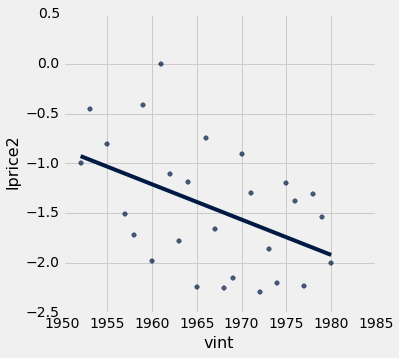

In [63]:
Tablewine.scatter('vint','lprice2', fit_line=True)

Thing is, wine *quality* varies with lots of things. Bordeaux wines and other robust reds from Napa and elsewhere get better with age; that's what we're seeing here. But other variables matter as well, and Ashenfelter's contribution was to explore which other variables matter.

The multivariate regression equation looks a lot like bivariate regression:

$$Y = a + b_1 X_1 + b_2 X_2 + b_3 X_3 + e$$

If you remember calculus, recall that when there are many variables floating around, it is the $partial derivative of Y$ that will get you the marginal change in $Y$ associated with a marginal change in a particular $X$.  Here, for example,

$$\frac{\partial Y}{\partial X_1} = b_1$$

and in general for any of the "covariates" or right-hand side variables $X_k$,

$$\frac{\partial Y}{\partial X_k} = b_k$$

The partial derivative of an $X_k$ is what you get when you change just that $X_k$ and leave everything else unchanged. It's closely related to the idea of a <b>treatment</b> that a scientist applies to one group and not to the control group. Although nature doesn't usually give us exactly this kind of situation in real life, it can sometimes come close.  And in Ashenfelter's wine data, some of those $X_k$'s indeed moved in unusual ways to produce the amazing Bordeaux vintage of 1961.

In [71]:
# Ashenfelter's preferred regression, the middle column in Table 2
x = wine[['ones','time_sv','degrees','hrain','wrain']]
y = wine['lprice2']
multiple_regress = sm.OLS(y, x).fit()
multiple_regress.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                lprice2   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     26.39
Date:                Mon, 28 Mar 2016   Prob (F-statistic):           4.06e-08
Time:                        17:19:34   Log-Likelihood:                -1.7963
No. Observations:                  27   AIC:                             13.59
Df Residuals:                      22   BIC:                             20.07
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
ones         -12.1453      1.688     -7.195      0.000       -15.646    -8.644
time_sv        0.0238      0.007      3.328      0.003         0.009     0.039
degrees        0.6164      0.095      6.476      0.000         0.419     0.814
hrain         -0.0039      0.001     -4.781      0.000        -0.006    -0.002
wrain          0.0012      0.000      2.421      0.024         0.000     0.002
==============================================================================
Omnibus:                        1.969   Durbin-Watson:                   2.787
Prob(Omnibus):                  0.374   Jarque-Bera (JB):                1.102
Skew:                           0.038   Prob(JB):                        0.576
Kurtosis:                       2.013   Cond. No.                     1.95e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.95e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [72]:
# Here is something that is close to the right column in Table 2, with "septemp" added
x = wine[['ones','time_sv','degrees','hrain','wrain','septemp']]
y = wine['lprice2']
multiple_regress = sm.OLS(y, x).fit()
multiple_regress.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                lprice2   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     20.17
Date:                Mon, 28 Mar 2016   Prob (F-statistic):           2.25e-07
Time:                        17:19:57   Log-Likelihood:                -1.7880
No. Observations:                  27   AIC:                             15.58
Df Residuals:                      21   BIC:                             23.35
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
ones         -12.1442      1.727     -7.031      0.000       -15.736    -8.552
time_sv        0.0242      0.008      3.068      0.006         0.008     0.041
degrees        0.6089      0.117      5.182      0.000         0.365     0.853
hrain         -0.0038      0.001     -3.927      0.001        -0.006    -0.002
wrain          0.0012      0.001      2.308      0.031         0.000     0.002
septemp        0.0067      0.058      0.114      0.910        -0.115     0.128
==============================================================================
Omnibus:                        2.198   Durbin-Watson:                   2.789
Prob(Omnibus):                  0.333   Jarque-Bera (JB):                1.158
Skew:                           0.026   Prob(JB):                        0.560
Kurtosis:                       1.987   Cond. No.                     1.95e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.95e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

/opt/conda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


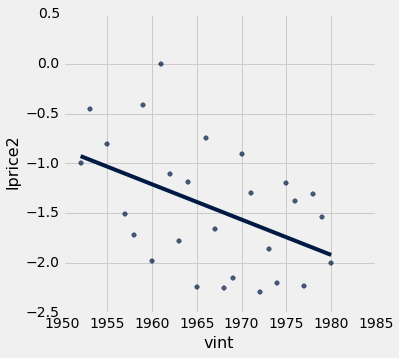

In [62]:
Tablewine.scatter('vint','lprice2', fit_line=True)

/opt/conda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


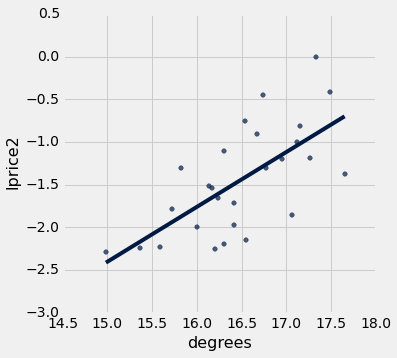

In [59]:
Tablewine.scatter('degrees','lprice2', fit_line=True)

/opt/conda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


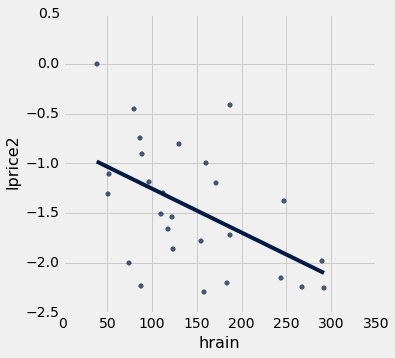

In [60]:
Tablewine.scatter('hrain','lprice2', fit_line=True)

/opt/conda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


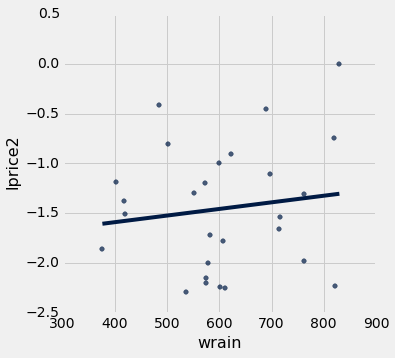

In [61]:
Tablewine.scatter('wrain','lprice2', fit_line=True)

/opt/conda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


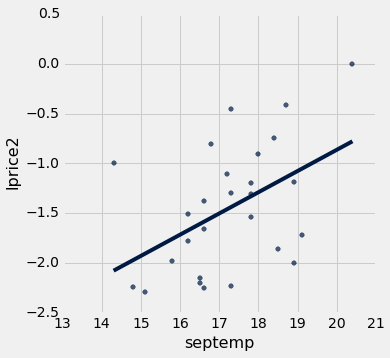

In [69]:
Tablewine.scatter('septemp','lprice2', fit_line=True)